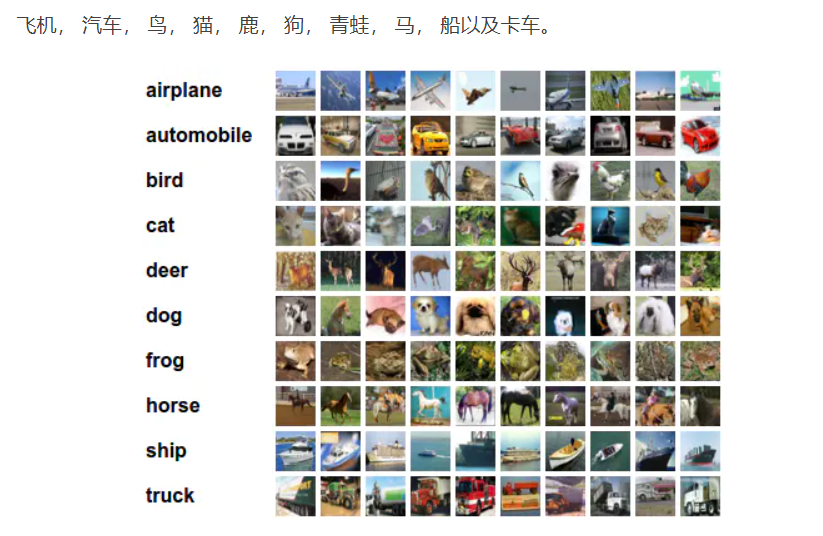

In [5]:
#直接使用Keras的dataset中的cifar10数据集，该数据集一共分为十类每一类都有50000个不同的样本
from IPython.display import Image #引入图片必备的类
Image(filename="C:\\Users\\JK\\Desktop\\1.png",width=400,height=200)#图片路径以及高度宽度

In [6]:
import tensorflow as tf
#tensorflow拥有多层结构，支持高性能数值计算，可以很方便处理一些复杂的问题
import matplotlib.pyplot as plt #主要用来画图
from tensorflow.keras.models import Sequential
#Sequential方法就相当于是一个容器框架一样，主要用来描述神经网络的网络结构，通过输入参数描述从输入层到输出层的网络结构
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
#layers存放着各种层，Dense主要代表全连接层，将上一层分离出来的特征神经元全部连接
#Dropout在训练过程每次更新参数时随机删除一定的输入神经元，主要用来防止过拟合
#Conv2D代表2维卷积核，MaxPooling2D代表的是2维的最大池化层
(x,y),(x_,y_)=tf.keras.datasets.cifar10.load_data()
#将所使用的十分类数据集下载，并且转换成为训练集和测试集，每一个训练集和测试集都分为输入样本，以及输出结果
#值得注意的是：输出结果已经进行了one—hot处理

In [7]:
print(x.shape)
print(y.shape)
#由输出结果可以看到训练集的输入样本为50000张32*32的图片，并且为3通道彩色图片，输出为一类结果

(50000, 32, 32, 3)
(50000, 1)


[9]


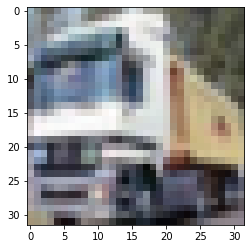

In [8]:
print(y[1])#输出训练集1号样本的输出类别，第9类为卡车
plt.imshow(x[1])#可以看出图像已经成功导入

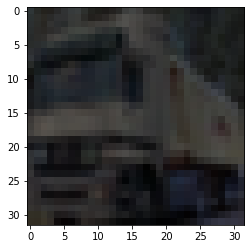

In [9]:
#下面开始对数据进行预处理，进行标准化操作
#进行标准化操作的时候既可以直接使用keras里面集成的类，也可以直接/255【图像的最大值是255】
x=tf.keras.utils.normalize(x,axis=1)
x_=tf.keras.utils.normalize(x_,axis=1)#设置维度为1，并且转换为灰度
plt.imshow(x[1])

In [10]:
#下面开始构造模型,一共建立12种模型，每一种模型都训练五次，并且查看每一种模型的损失函数和准确率，寻找最优模型，从而最大程度提高准确率，减小损失值
conv_count=[1,2]#可以有1个卷积层
full_count=[1,2,3]#可以有1/2/3个全连接层
shenjing_count=[32,64]#可以有32/64个神经元
for i in conv_count:
    for j in full_count:
        for k in shenjing_count:
            m=Sequential()#m便作为构造模型的对象
            m.add(Conv2D(k,(3,3),activation='relu'))#第一层先建立一个卷积层,64个3*3的卷积核去卷一个图像，并且激活函数使用relu函数
            m.add(MaxPooling2D(pool_size=(2,2)))#第二层便是构建最大池化层，使用的池化核为2*2
            for a in range(i-1):
                m.add(Conv2D(k,(3,3),activation='relu'))
                m.add(MaxPooling2D(pool_size=(2,2)))#一层卷积总是带着一层池化
            m.add(Flatten())#第三层是构造一个平化层，相当于将一个好几维的图像直接拉平，比如说：10*10维的图像拉平成为100,使用此方法可以直接对前两层传下来的神经元进行操作
            for b in range(j):
                m.add(Dense(k,activation='relu'))#全连接层
            m.add(Dense(10,activation='softmax'))#输出层，一共输出十种分类，softmax作为分类器,通过一个图像输出的各个分类的概率，选出概率最大的那个分类便是最终的输出分类
            m.compile(
                tf.keras.optimizers.SGD(lr = 0.1),#构造梯度下降优化函数，并且学习率设置为0.1
                loss="sparse_categorical_crossentropy",#损失函数选择多分类交叉熵损失函数，由于在数据集中分类的标签所选用的是序号编码，所以损失函数只能选择这个
                metrics="accuracy")#模型的评价指标定义为准确率
            #compile函数定义在训练时，输入模型所用的优化器、损失函数和模型的评价指标
            m.fit(x,y,batch_size=100,epochs=3,validation_split=0.3)#由于模型数目较多，并且仅仅是为了判断出来那个模型更好，所以训练轮数越低越好
           #x代表的是输入数据，y代表的是最终的分类标签，batch_size来规定一次性处理多少张图片
           #epochs表示将所有的数据进行几次训练，validation_split表示0-1之间的浮点数，用来指定训练集的一定比例数据作为验证集,验证集不参与训练

Epoch 1/3
350/350 [==============================] - 10s 27ms/step - loss: 2.1413 - accuracy: 0.2142 - val_loss: 2.0029 - val_accuracy: 0.2869
Epoch 2/3
350/350 [==============================] - 9s 26ms/step - loss: 1.8940 - accuracy: 0.3306 - val_loss: 1.8757 - val_accuracy: 0.3286
Epoch 3/3
350/350 [==============================] - 9s 26ms/step - loss: 1.7342 - accuracy: 0.3900 - val_loss: 1.8060 - val_accuracy: 0.3693
Epoch 1/3
350/350 [==============================] - 17s 49ms/step - loss: 2.1380 - accuracy: 0.2193 - val_loss: 2.0005 - val_accuracy: 0.2845
Epoch 2/3
350/350 [==============================] - 18s 53ms/step - loss: 1.9001 - accuracy: 0.3289 - val_loss: 1.7634 - val_accuracy: 0.3893
Epoch 3/3
350/350 [==============================] - 18s 52ms/step - loss: 1.7327 - accuracy: 0.3904 - val_loss: 1.7772 - val_accuracy: 0.3728
Epoch 1/3
350/350 [==============================] - 10s 27ms/step - loss: 2.1816 - accuracy: 0.1970 - val_loss: 2.0367 - val_accuracy: 0.2720
E

通过上述比较可以发现，当模型为2个卷积层，1个全连接层，以及64个神经元时模型是最好的

下面便开始使用最优模型建立卷积神经网络训练模型

In [11]:
best=Sequential()
for i in range(2):
    best.add(Conv2D(64,(3,3),activation='relu'))
    best.add(MaxPooling2D(pool_size=(2,2)))
best.add(Flatten())
best.add(Dense(64,activation='relu'))
best.add(Dense(10,activation='softmax'))
best.compile(tf.keras.optimizers.SGD(lr = 0.1),
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")
History=best.fit(x,y,batch_size=100,epochs=20,validation_split=0.3)#best.fit()返回一个History对象,记录不断训练的过程中所产生的损失值和准确率
#在最优模型中一共训练20轮，并且通过validation_split将一定比例的训练集划分为测试集，而后再进行不断的训练，此时真正的验证集并不参与运算
#在输出结果中前面代表的是训练集的损失值和准确率而后面代表的是从训练集中划分出来的测试集的损失值和准确率

Epoch 1/20
350/350 [==============================] - 27s 78ms/step - loss: 2.1945 - accuracy: 0.1882 - val_loss: 2.0359 - val_accuracy: 0.2774
Epoch 2/20
350/350 [==============================] - 27s 77ms/step - loss: 1.9181 - accuracy: 0.3184 - val_loss: 1.8447 - val_accuracy: 0.3427
Epoch 3/20
350/350 [==============================] - 27s 76ms/step - loss: 1.7396 - accuracy: 0.3861 - val_loss: 1.6466 - val_accuracy: 0.4087
Epoch 4/20
350/350 [==============================] - 27s 77ms/step - loss: 1.6140 - accuracy: 0.4285 - val_loss: 1.5412 - val_accuracy: 0.4510
Epoch 5/20
350/350 [==============================] - 27s 77ms/step - loss: 1.5159 - accuracy: 0.4643 - val_loss: 1.4755 - val_accuracy: 0.4731
Epoch 6/20
350/350 [==============================] - 28s 81ms/step - loss: 1.4203 - accuracy: 0.5004 - val_loss: 1.4387 - val_accuracy: 0.4934
Epoch 7/20
350/350 [==============================] - 29s 81ms/step - loss: 1.3319 - accuracy: 0.5323 - val_loss: 1.3578 - val_accuracy:

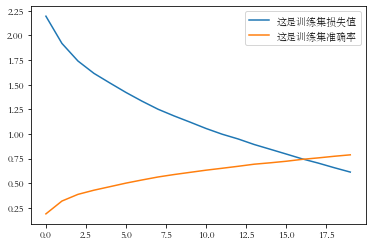

In [12]:
plt.rcParams['font.sans-serif']=['STSong']#font.sans-serif设置字体可以显示中文
#下面开始展示训练集损失值和准确率变换过程
plt.plot(History.history['loss'],label="这是训练集损失值")#损失值
plt.plot(History.history['accuracy'],label="这是训练集准确率")#准确率
plt.legend(loc='upper right')

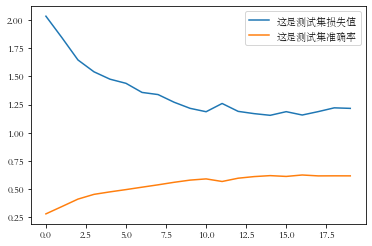

In [17]:
#下面开始展示测试集损失值和准确率变换过程
plt.plot(History.history['val_loss'],label="这是测试集损失值")#损失值
plt.plot(History.history['val_accuracy'],label="这是测试集准确率")#准确率
plt.legend(loc='upper right')

In [13]:
best.summary()#查看所建立的最优模型的网络结构

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (100, 30, 30, 64)         1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (100, 15, 15, 64)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (100, 13, 13, 64)         36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (100, 6, 6, 64)           0         
_________________________________________________________________
flatten_12 (Flatten)         (100, 2304)               0         
_________________________________________________________________
dense_36 (Dense)             (100, 64)                 147520    
_________________________________________________________________
dense_37 (Dense)             (100, 10)               

In [14]:
#下面便是使用最终模型进行预测
pre=best.predict(x_)#将测试集输入进模型中进行预测
print(pre)#可以看到每一个测试集都有十种分类的概率，其中概率最大的那个就是分类结果

[[1.46663457e-03 1.33702415e-04 7.09839724e-03 ... 3.94614966e-04
  1.34956441e-03 2.96177226e-04]
 [1.10428482e-02 2.96961516e-02 1.07913775e-05 ... 9.44535770e-07
  9.56111073e-01 3.13304085e-03]
 [2.63715256e-02 1.46920383e-01 4.79479932e-04 ... 2.92670622e-04
  5.37864685e-01 2.83464998e-01]
 ...
 [2.67466976e-06 3.65107189e-05 6.72973022e-02 ... 2.87062139e-03
  5.03676187e-04 2.95891459e-05]
 [7.72426417e-03 9.27048802e-01 1.86605807e-02 ... 1.44711487e-06
  1.38332404e-03 6.84789848e-04]
 [6.26916744e-07 1.76439607e-06 8.98406201e-04 ... 9.73274052e-01
  4.60670271e-05 1.17311323e-07]]


In [15]:
import numpy as np
pre=np.argmax(pre,axis=1)#将维度设置为1，寻找概率最大的那个
pre=np.reshape(pre,(len(pre),1))#因为最终需要与y_进行比较，所以需要将预测出来的结果进行转置
#pre便是最终做出来的预测的值
print(1-np.count_nonzero(pre-y_)/len(y_))#当pre-y_达到了0的时候说明分类成功，此方法便是求出最终模型预测成功的准确率

0.6223000000000001


In [18]:
#下面便开始通过混淆矩阵看该模型每个类别样本的查全率,检测率，以及准确率
from sklearn.metrics import confusion_matrix
s= confusion_matrix(y_,pre)#confusion_matrix给定预测值和测试正确的结果，便可以得到混淆矩阵
print(s)

[[694  27  63  26  21   7  20  11  85  46]
 [ 15 759  22  14   7   9  25   3  33 113]
 [ 69  13 570  63  96  43  69  32  22  23]
 [ 36  22 135 420  74 113  93  34  40  33]
 [ 25  15 135  71 537  32  69  67  36  13]
 [ 22  11 140 188  61 446  46  52  17  17]
 [ 14  26  76  56  40  23 709   8  26  22]
 [ 15  12  61  60  92  60  17 622  11  50]
 [ 68  55  21  13  14   8  11   3 746  61]
 [ 37 111  19  20   6   8  21  13  45 720]]


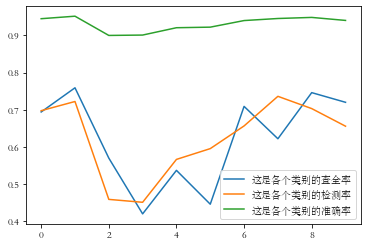

In [19]:
plt.rcParams['font.sans-serif']=['STSong']#font.sans-serif设置字体可以显示中文
FP = list(s.sum(axis=0)-np.diag(s))#FP表示预测为正，但是标签为负的样本数量
TP = list(np.diag(s))#TP表示预测为正，标签也为正的样本数量
FN = list(s.sum(axis=1)-np.diag(s))#FN表示预测为负，但是标签为正的样本数量
TN = list(s.sum()-(FP + FN + TP))#TN表示标签为负，预测也为负的情况
zhun=[]
chaquan=[]
jiance=[]#通过这三个列表根据上面的那些参数描述出来每个类别的查全率和检测率,准确率
for i in range(10):
    jiance.append(TP[i]/(TP[i]+FP[i]))#查全率与查准率(准确率)相反,查全率高那么准确率就低
for i in range(10):
    chaquan.append(TP[i]/(TP[i]+FN[i]))
for i in range(10):
    zhun.append((TP[i]+TN[i])/(TP[i]+FN[i]+FP[i]+TN[i]))
plt.plot(chaquan,label="这是各个类别的查全率")#查全率
plt.plot(jiance,label="这是各个类别的检测率")#检测率
plt.plot(zhun,label="这是各个类别的准确率")#准确率
plt.legend(loc='lower right')

检测出来的物体为: 汽车


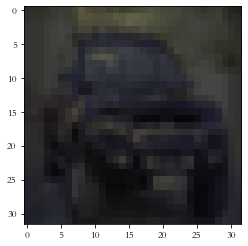

In [20]:
#现在用图像来验证是否分类正确
n=['飞机','汽车','鸟','猫','鹿','狗','青蛙','马','船','卡车']
print("检测出来的物体为:",n[pre[9][0]])
plt.imshow(x_[9])